# PHYS2923 SSP Project


### Aim
Initially the aim of this code is to simulate ~100 particles in a 1nm*4 square box. The goal is to study how certain thermodynamic variables such as temperature, pressure, entropy behave and whether we can make sense of them on this small scale. 

### Defining parameters

#### Box
* The box will consist of 4 walls which are $10^{-9}$m in length
* One wall will be an adjustable wall which can be moved in similar to a piston
* The wall will essentially consist of **hard**, but infinitesimally small particles which elastically collide with the particles inside the box
* The walls will be used to measure pressure

#### Particles
* Each particle will be circular, and have a radius of the Bohr radius $a_0 = 5.29177210903\cdot10^{-11}$m
* Each particle will have a mass equal to that of Hydrogen 1.00784 AMU
* Each particle will be described using the following three vectors:

* Position $ \vec x = (x, y)$

* Velocity $ \vec v = (v_x, v_y)$

* Acceleration $ \vec a = (a_x, a_y)$

### Forces acting on the particles
#### Elastic repulsive force between particles
For two particles $1$ and $1$ if:

$$distance(\vec x_1, \vec x_1) \le 2a_0$$

At this point, our particles will have an elastic collision in $2-D$ whereby the conservation laws of momentum and kinetic energy. For each particle, its velocity must be split into the component along the direction of the collision and one component perpendicular to the collision. Since momentum (and hence velocity) is only imparted along the direction of the collision, the component perpendicular remains unchanged. The velocities along the line of collision can then be changed according the the equations of a $1-D$ collision 

###### Begin with a 1D collision
To begin with a $1-D$ collision, first let us consider the relevant laws:

Momentum: $\vec p = m \vec v$
<br>
Kinetic energy: $KE = \frac{1}{2} m \vec v^2$

Conservation of **momentum**: 
$$\vec p_1 + \vec p_2 = \vec p_1' + \vec p_2'$$

Conservation of **kinetic energy**:
$$\frac{1}{2} m_1 \vec v_1^2 + \frac{1}{2} m_2 \vec v_2^2 = \frac{1}{2} m_1 \vec v_1'^2 + \frac{1}{2} m_2 \vec v_2'^2$$

This leaves us with a final result if we work through the algebra:

$$ v_1' = \frac{v_1 (m_1 - m_2) + 2 m_2 v_2}{m_1 + m_2}$$
$$ v_2' = \frac{v_2 (m_2 - m_1) + 2 m_1 v_1}{m_1 + m_2}$$

We can use this in our 2-D collision system

##### Elastic Collisions in 2D

1. Firstly we need to find the unit normal and unit tangent vectors with respect to the line of the collision. 

The normal vector
$$ \vec n = ( x_2 - x_1, y_2 - y_1)$$

Next we find the unit vector of $ \vec n$, denoted $\hat n$
$$ \hat n = \frac{\vec n}{|\vec n|} = \frac{\vec n}{\sqrt{n_x^2 + n_y^2}}$$

To generate the unit tangent vector $\hat t$:

$$ \hat t = (-\hat n_y, \hat n_x)$$

<img src="2d_elastic.jpeg" width="80%">


2. Now we need to project the velocity components of our particles onto the unit normal and unit tangent vectors using the dot product:

$$v_{1n} = -\hat n \cdot \vec v_1$$
$$v_{1t} = \hat t \cdot \vec v_1$$

$$v_{2n} = \hat n \cdot \vec v_2$$
$$v_{2t} = \hat t \cdot \vec v_2$$

<img src="2d_elastic_2.jpeg" width="60%">

3. Find the new tangential velocities after the collision. This is quite simple, they are unaffected.

$$v'_{1t} = v_{1t}$$
$$v'_{2t} = v_{2t}$$

4. Now we have to find the new normal velocities. Here we use the one dimensional collision formulas
$$ v_{1n}' = \frac{v_{1n} (m_1 - m_2) + 2 m_2 v_{2n}}{m_1 + m_2}$$
$$ v_{2n}'= \frac{v_{2n} (m_2 - m_1) + 2 m_1 v_{1n}}{m_1 + m_2}$$

5. Now we convert the scalar normal and tangential normal velocities back into vectors. We do this by multiplying the unit normal vector by the scalar normal velocity (cf. tangential)

$$\vec v_{1n}' = v_{1n}' \cdot \hat n$$
$$\vec v_{1t}' = v_{1t}' \cdot \hat t$$

$$\vec v_{2n}' = v_{2n}' \cdot \hat n$$
$$\vec v_{2t}' = v_{2t}' \cdot \hat t$$

6. Then we create our new velocity vectors by by adding the normal and tangential components of each particle:

$$ \vec v_1' = \vec v_{1n}' + \vec v_{1t}'$$
$$ \vec v_2' = \vec v_{2n}' + \vec v_{2t}'$$

7. The last step is to resolve the  these vectors back into $(v_x, v_y)$

We do this by by projecting the velocity vectors onto the unit vectors in the $x$ and $y$ directions:
$$ \vec v_1' = (\hat i \cdot \vec v_1', \hat j \cdot \vec v_1') = (v_{1x}', v_{1y}')$$
$$ \vec v_2' = (\hat i \cdot \vec v_2', \hat j \cdot \vec v_2') = (v_{2x}', v_{2y}')$$

Given that our Velocity Verlet algorithm uses acceleration to apply changes to velocity, we cannot simply instantaneously change velocity. We need to convert the changes in velocity from this collision to equivalent acceleration in order for the algorithm to work. To do this:

$$ \vec a_1' = \frac{(\vec v_1' - \vec v_1)}{\Delta t}$$
$$ \vec a_2' = \frac{(\vec v_2' - \vec v_2)}{\Delta t}$$

##### Collisions with the wall
Since the particle is to be confined to a box, when the particle hits a wall we need to define the behaviour. The way to do this is to check the distance between the position coordinates of the particle and each of the walls. The way to do this is to check the distance between the center coordinates $(x_0,y_0)$ and a line defined by two points $(P_1, P_2)$ see [Wikipedia](https://en.wikipedia.org/wiki/Distance_from_a_point_to_a_line):

$$distance(P_1, P_2, (x_0, y_0)) = \frac{|(x_2 - x_1)(y_1 - y_0) - (x_1 - x_0)(y_2 - y_1)|}{\sqrt{(x_2 -x_1)^2 +(y_2 -y_1)^2}}$$


There are a few cases which can occur here. 

1. The particle is closer than or equal to its radius from the **one** wall. In the case that it is a vertical wall, the horizontal velocity vector of the particle changes sign. If it is a horizontal wall, the vertical velocity vector changes sign
2. In the case the particle is closer to 2 wall (corners) both velocity vectors are changed. 

###### Representing our Box
Consider we have 4 points which represent our walls and one point representing the center of our particle. We have 2 limits, an $x_{lim}$ and a $y_{lim}$. Thus we have four points representing our box:

* Left-Bottom Corner: $(0,0)$
* Left-Top Corner: $(0, y_{lim})$
* Right-Bottom Corner: $(x_{lim}, 0)$
* Right-Top Corner: $(x_{lim}, y_{lim})$

Thus there are two horizontal lines and two vertical lines defined by their end points:

* Vertical Line 1: $((0,0),(0, y_{lim}))$
* Vertical Line 2: $((x_{lim}, 0),(x_{lim}, y_{lim}))$
* Horizontal Line 1: $((0,0),(x_{lim}, 0)$
* Horizontal Line 2: $((0,y_{lim}),(x_{lim}, y_{lim}))$

###### Collisions with one wall
1. Vertical collisions

$$If$$
$$distance((0,0),(0, y_{lim}), (x_0, y_0)) \le a_0 $$

$$or $$

$$distance((x_{lim}, 0),(x_{lim}, y_{lim}), (x_0, y_0)) \le a_0$$

$$then$$

$$ \vec v' = (-v_x, v_y)$$

Given then that we need to think about changes in velocity in terms of acceleration, we have:

$$ \vec a' = \frac{(v_x'-v_x,v_y'-v_y)}{\Delta t} = \frac{(-v_x-v_x,0)}{\Delta t} =\frac{(-2v_x,0)}{\Delta t}$$

2. Horizontal collisions

$$If$$
$$distance((0,0),(x_{lim}, 0), (x_0, y_0)) \le a_0 $$

$$or $$
$$distance((0,y_{lim}),(x_{lim}, y_{lim})) \le a_0$$

$$then$$

$$ \vec v' = (v_x, -v_y)$$

Given then that we need to think about changes in velocity in terms of acceleration, we have:

$$ \vec a' = \frac{(v_x'-v_x,v_y'-v_y)}{\Delta t} = \frac{(0,-v_y-v_y)}{\Delta t} =\frac{(0,-2v_y)}{\Delta t}$$

###### Collisions with 2 walls
In the case that the distance between a particle and any two walls is less than or equal to $a_0$ then both the $x$ and $y$ velocity components reverse. Could this be more complex?

$$ \vec v' = (-v_x, -v_y)$$

Given then that we need to think about changes in velocity in terms of acceleration, we have:

$$ \vec a' = \frac{(v_x'-v_x,v_y'-v_y)}{\Delta t} = \frac{(-v_x-v_x,-v_y-v_y)}{\Delta t} =\frac{(-2v_x,-2v_y)}{\Delta t}$$

#### Attractive potential between particles
TBC

### Velocity Verlet Algorithm
Suppose we have a system with N particles. As we have discussed, each particle $i$ has position, velocity and acceleration vectors at a particular time $t$ denoted by:
* Position $ \vec x_i(t) = (x_i, y_i)$

* Velocity $ \vec v_i(t) = (v_{ix}, v_{iy})$

* Acceleration $ \vec a_i(t) = (a_{ix}, a_{iy})$

Importantly, we assume our Acceleration $ \vec a_i(t)$ depends only on position not on velocity. 

First we begin with a particle with a known set of position, velocity and acceleration vectors at a time $t$:
$ \vec x_i(t) = (x_0, y_0)$

$ \vec v_i(t) = (v_{x0}, v_{y0})$

$ \vec a_i(t) = (a_{x0}, a_{x0})$

Now we calculate our new position and velocity after time $\Delta t$:

$$ \vec x_i(t + \Delta t) = x_i(t) + v_i(t)\Delta t + \frac{1}{2}a_i(t) \Delta t^2$$

$$ \vec v_i(t + \Delta t) = v_i(t) + \frac{\vec a(t) + \vec a(t + \Delta t)}{2} \Delta t$$

We can simplify the algorithm to the following:

1. Calculate $ \vec x_i(t + \Delta t) = x_i(t) + v_i(t)\Delta t + \frac{1}{2}a_i(t) \Delta t^2$
2. Calculate $ \vec a_i(t) $ using our particle interactions
3. Calculate $ \vec v_i(t + \Delta t) = v_i(t) + \frac{\vec a(t) + \vec a(t + \Delta t)}{2} \Delta t$

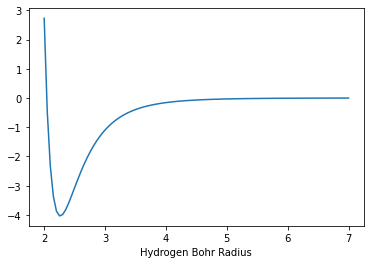

In [84]:
import matplotlib.pyplot as plt
import numpy as np
x_lim = 1e-9
radius = 5.29177210903e-11
epsilon = 0.11
sigma = 2.4
def lj_force(r, epsilon, sigma):
    """
    Implementation of the Lennard-Jones potential 
    to calculate the force of the interaction.

    The force scalar is the derivative wrt to R 
    f = -partial(LJ_potential)/partial*r
    """

    return 48 * epsilon * (pow(sigma,12)/pow(r,13)-24*epsilon*pow(sigma,6)/pow(r,7))
d = np.linspace(2,7, 100)
f = lj_force(d, epsilon, sigma)
# r = 1/radius * d
plt.plot(d,f)
plt.xlabel('Hydrogen Bohr Radius')
plt.show()

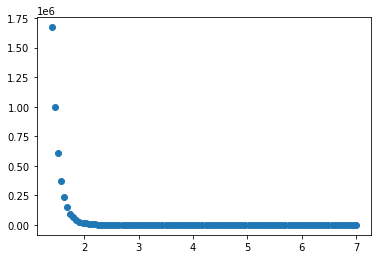

In [60]:
plt.scatter(r,f)